In [15]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

## Read a csv-file to a dataframe

In [16]:
df = pd.read_csv('../data/ab-test.csv')
df

,uid,diff,time,group
0,user_1,-103.333333,after,test
1,user_1,-6.000000,before,test
2,user_18,-10.000000,after,test
3,user_18,-3.500000,before,test
4,user_19,-82.333333,after,test
5,user_19,-148.000000,before,test
6,user_21,-78.500000,after,test
7,user_21,-112.500000,before,test
8,user_25,-127.500000,after,test
9,user_25,-69.333333,before,test


## Calculations for plotting

In [17]:
after = df[df['time'] == 'after']
after_control = after[after['group'] == 'control']['diff']
after_test = after[after['group'] == 'test']['diff']

In [18]:
after = df[df['time'] == 'after']
after

,uid,diff,time,group
0,user_1,-103.333333,after,test
2,user_18,-10.000000,after,test
4,user_19,-82.333333,after,test
6,user_21,-78.500000,after,test
8,user_25,-127.500000,after,test
10,user_28,-136.500000,after,test
12,user_3,-158.500000,after,test
14,user_12,-75.000000,after,control
16,user_13,-81.500000,after,control
18,user_15,-32.000000,after,control


In [19]:
before = df[df['time'] == 'before']
before

,uid,diff,time,group
1,user_1,-6.000000,before,test
3,user_18,-3.500000,before,test
5,user_19,-148.000000,before,test
7,user_21,-112.500000,before,test
9,user_25,-69.333333,before,test
11,user_28,-53.000000,before,test
13,user_3,-70.000000,before,test
15,user_12,-103.000000,before,control
17,user_13,-15.500000,before,control
19,user_15,-3.000000,before,control


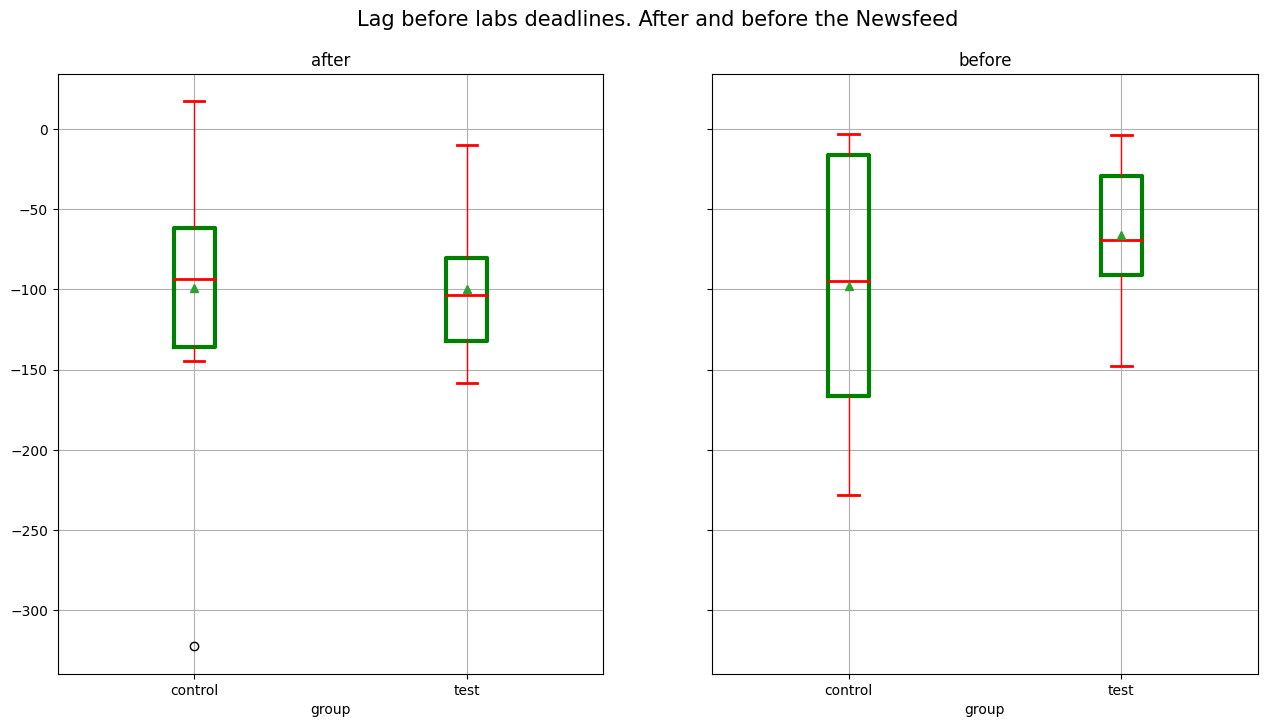

In [20]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(15, 8))
after.boxplot(column='diff', by='group', ax=ax[0],
    boxprops={'linewidth':3, 'color':'g'},
    medianprops={'linewidth':2, 'color':'r'},
    whiskerprops={'linewidth':1, 'color':'r'},
    capprops={'linewidth':2, 'color': 'r'},
    showmeans=True)
before.boxplot(column='diff', by='group', ax=ax[1],
    boxprops={'linewidth':3, 'color':'g'},
    medianprops={'linewidth':2, 'color':'r'},
    whiskerprops={'linewidth':1, 'color':'r'},
    capprops={'linewidth':2, 'color': 'r'},
    showmeans=True)
plt.xticks([1,2], ['control', 'test'])
plt.suptitle('Lag before labs deadlines. After and before the Newsfeed',
    fontsize=15)
ax[0].set_title('after')
ax[1].set_title('before')
plt.show()

## What was the IQR of the control group before the newsfeed?

150